# Iteration test
This file demonstrates how to initialize an Equilibrium object from leading order quantities and tests its accuracy.

In [1]:
# This file implements and tests recursion relations
import numpy as np
from matplotlib import pyplot as plt

# for importing parsed codes
import sys
import cProfile
sys.path.insert(1,'../python_source/MHD_parsed/')
sys.path.insert(1,'../python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
from equilibrium import *

from leading_orders import *


import MHD_parsed
debug_path = '../test_data_eduardo/'

## Initializing an `Equilibrium`
### Required quantities and orders
Unknowns:

1. X_coef_cp: 2
2. Y_coef_cp: 2
3. Z_coef_cp: 2
4. B_psi_coef_cp: 0
5. B_theta_coef_cp: 2
6. iota_coef: 0
7. Delta_coef_cp: 3
8. p_perp_coef_cp: 3

Known constants:
1. B_denom_coef_c: 2
2. B_alpha_coef: 1
3. kap_p
4. dl_p 
5. tau_p
6. eta

In [2]:
%%time
equilibrium = circular_axis()

hard_cutoff_freq <class 'int'>
looped, before evaluating tensor, type of hard_cutoff_freq: <class 'int'>
looped, right before the error, type of len_tensor, when its first defined: <class 'int'>
len_tensor 40
inv_transposed_tensor_fft_op (2, 40, 2, 40)
RHS_0_offset (2, 40)
CPU times: user 50.4 s, sys: 2.91 s, total: 53.3 s
Wall time: 43.8 s


In [3]:
equilibrium_soft = iterate_2(
    equilibrium,
    n_eval=4,
    B_alpha_nb2=0,
    B_denom_nm1=ChiPhiFunc(jnp.array([
        [0.   +0.j   ],
        [0.005+0.005j],
        [0.005-0.005j],
        [0.   +0.j   ]]), 1), 
    B_denom_n=ChiPhiFuncSpecial(0),
    iota_new=-0.66367278,
    cutoff_freq=(20, 20)
)

equilibrium_hard = iterate_2(
    equilibrium,
    n_eval=4,
    B_alpha_nb2=0,
    B_denom_nm1=ChiPhiFunc(jnp.array([
        [0.   +0.j   ],
        [0.005+0.005j],
        [0.005-0.005j],
        [0.   +0.j   ]]), 1), 
    B_denom_n=ChiPhiFuncSpecial(0),
    iota_new=-0.66367278,
    hard_cutoff_freq=(20, 20)
)

Evaluating order 3 4
looped, before evaluating tensor, type of hard_cutoff_freq: <class 'int'>
looped, right before the error, type of len_tensor, when its first defined: <class 'int'>
len_tensor 1000
inv_transposed_tensor_fft_op (4, 1000, 4, 1000)
RHS_0_offset (4, 1000)
looped, before evaluating tensor, type of hard_cutoff_freq: <class 'int'>
looped, right before the error, type of len_tensor, when its first defined: <class 'int'>
len_tensor 1000
inv_transposed_tensor_fft_op (4, 1000, 4, 1000)
RHS_0_offset (4, 1000)
Evaluating order 3 4
looped, before evaluating tensor, type of hard_cutoff_freq: <class 'int'>
looped, right before the error, type of len_tensor, when its first defined: <class 'int'>
len_tensor 1000
inv_transposed_tensor_fft_op (4, 1000, 4, 1000)
RHS_0_offset (4, 1000)
looped, before evaluating tensor, type of hard_cutoff_freq: <class 'int'>
looped, right before the error, type of len_tensor, when its first defined: <class 'int'>
len_tensor 1000
inv_transposed_tensor_fft

In [13]:
equilibrium_soft2 = iterate_2(
    equilibrium,
    n_eval=4,
    B_alpha_nb2=0,
    B_denom_nm1=ChiPhiFunc(jnp.array([
        [0.   +0.j   ],
        [0.005+0.005j],
        [0.005-0.005j],
        [0.   +0.j   ]]), 1), 
    B_denom_n=ChiPhiFuncSpecial(0),
    iota_new=-0.66367278,
    cutoff_freq=(20, 20),
    hard_cutoff_freq=(100, 100)
)

Evaluating order 3 4
looped, before evaluating tensor, type of hard_cutoff_freq: <class 'int'>
looped, right before the error, type of len_tensor, when its first defined: <class 'int'>
len_tensor 1000
inv_transposed_tensor_fft_op (4, 1000, 4, 1000)
RHS_0_offset (4, 1000)
looped, before evaluating tensor, type of hard_cutoff_freq: <class 'int'>
looped, right before the error, type of len_tensor, when its first defined: <class 'int'>
len_tensor 1000
inv_transposed_tensor_fft_op (4, 1000, 4, 1000)
RHS_0_offset (4, 1000)


In [4]:
jit_fftfreq_int(3)

DeviceArray([ 0,  1, -1], dtype=int64)

# Iterate 2 orders using the full MHD equations

equilibrium## Accessing data and checking accuracy

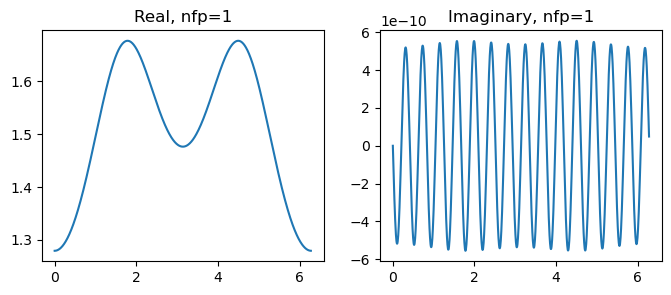

In [5]:
equilibrium.unknown['B_theta_coef_cp'][2].display_content()

B_psi_coef_cp n = 0


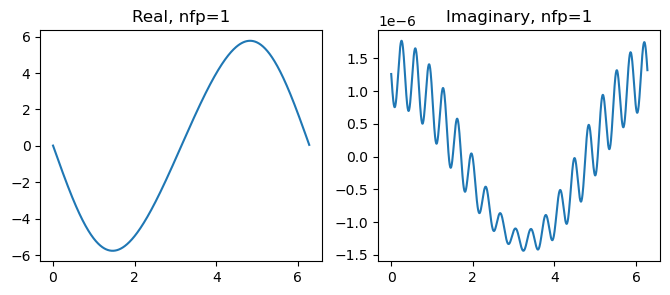

B_theta_coef_cp n = 2


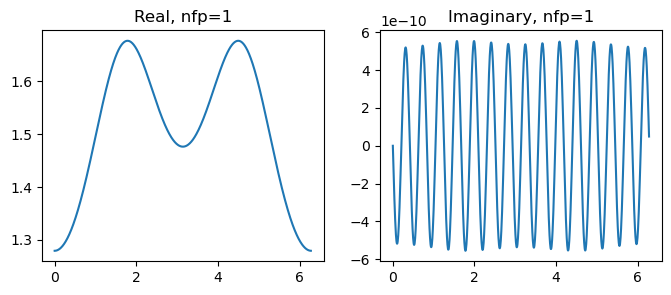

Delta_coef_cp n = 2


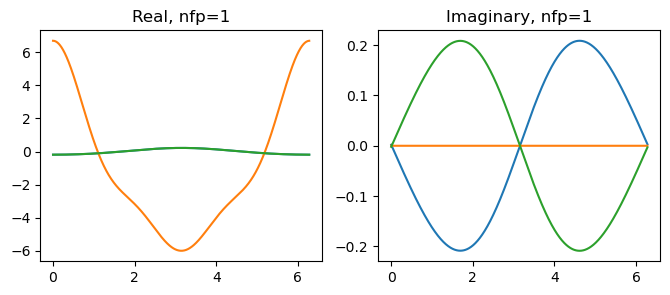

X_coef_cp n = 2


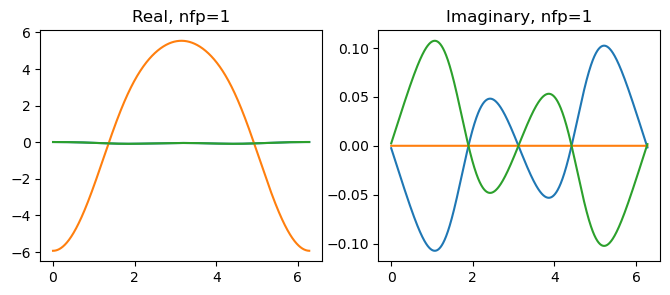

Y_coef_cp n = 2


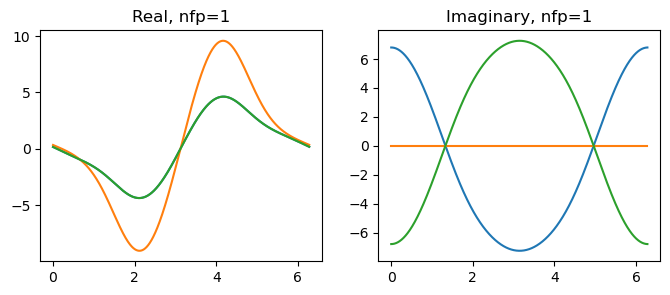

Z_coef_cp n = 2


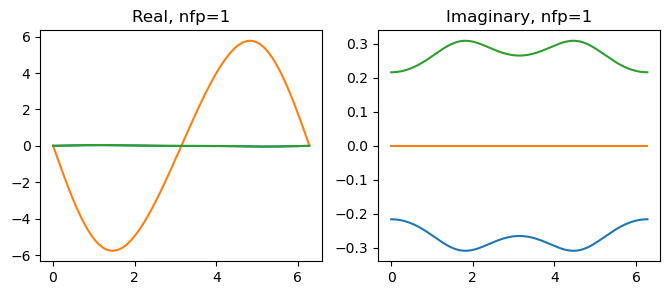

iota_coef n = 2
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
p_perp_coef_cp n = 2


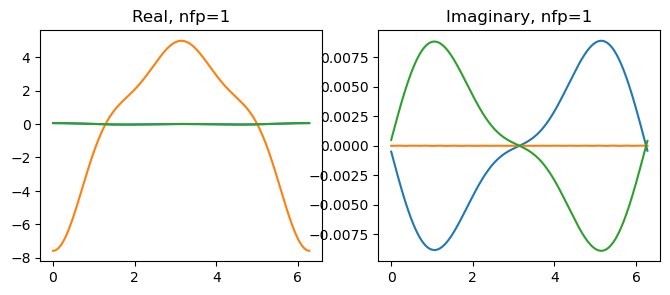

In [6]:
equilibrium.display_order(2)

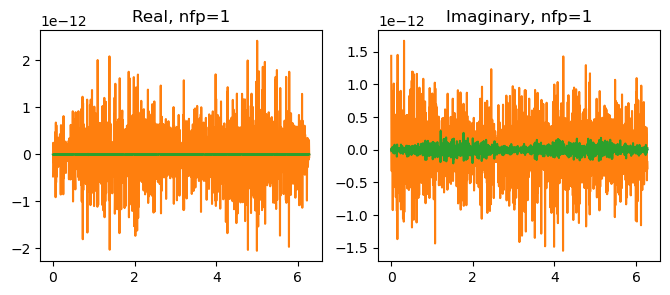

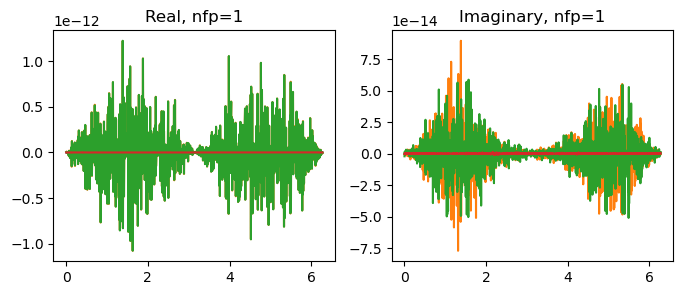

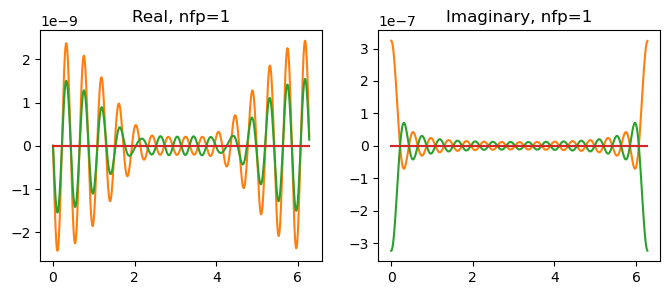

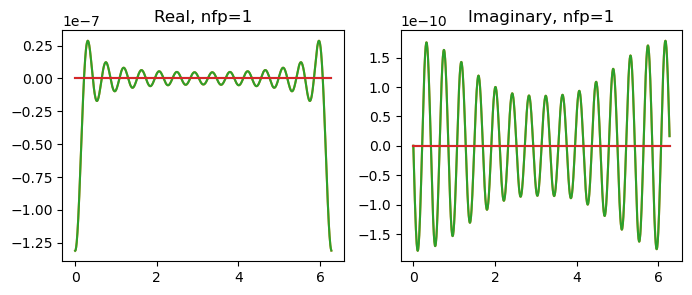

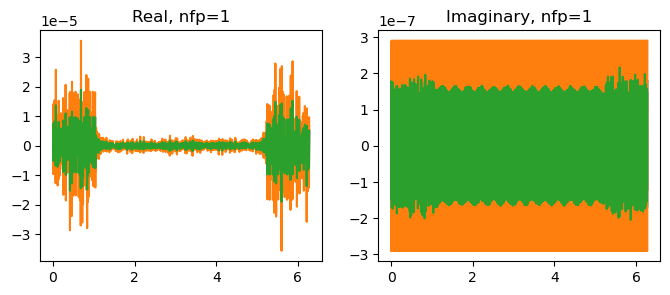

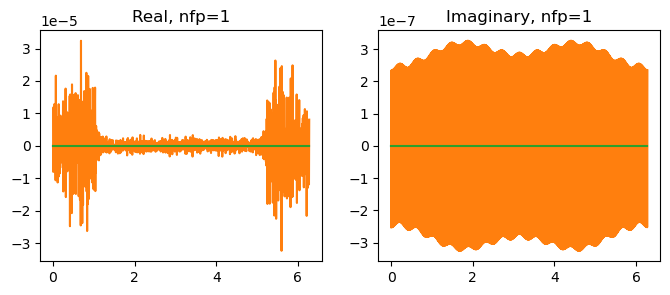

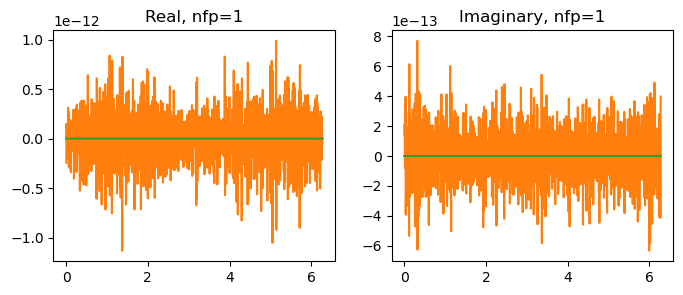

In [9]:
(J, Cb, Ck, Ct, I, II, III) = equilibrium_soft.check_governing_equations(2)
J.display_content()
Cb.display_content()
Ck.display_content()
Ct.display_content()
I.display_content()
II.display_content()
III.display_content()


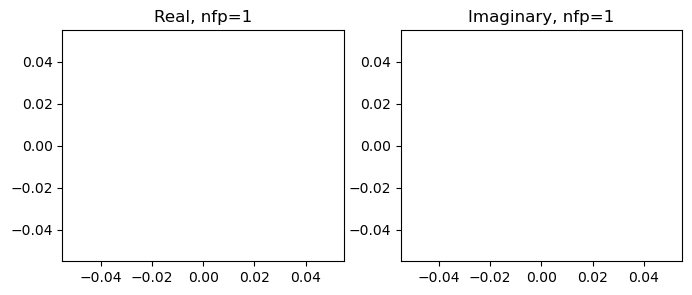

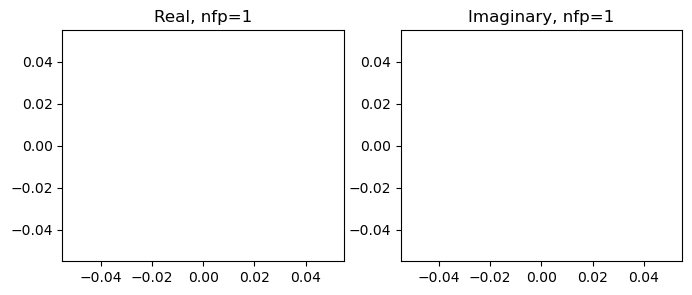

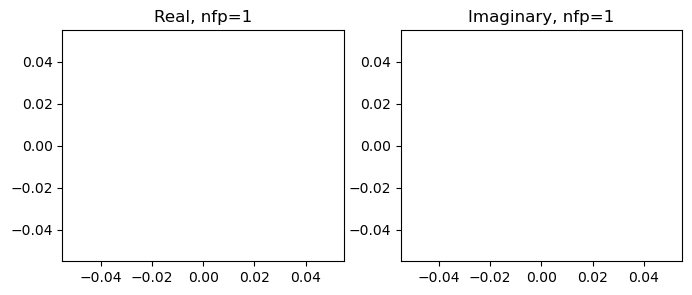

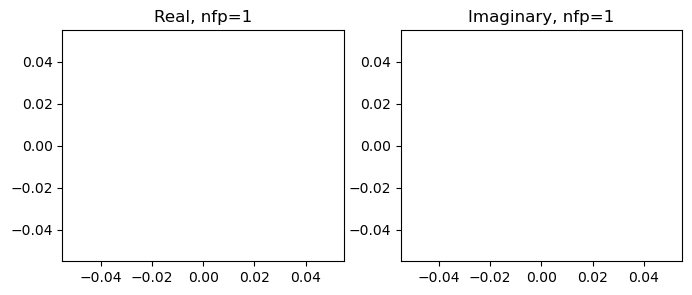

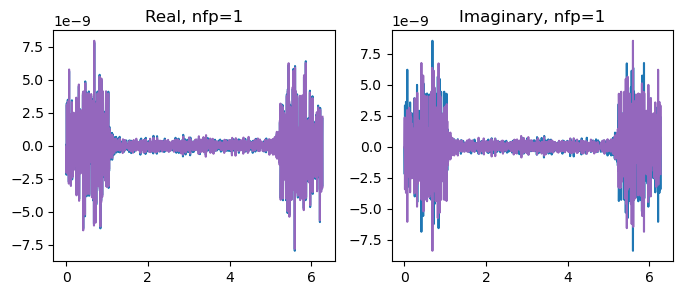

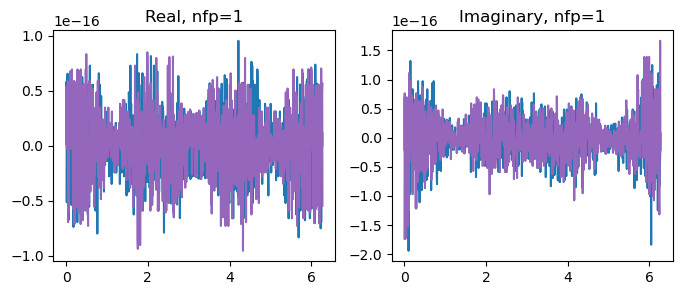

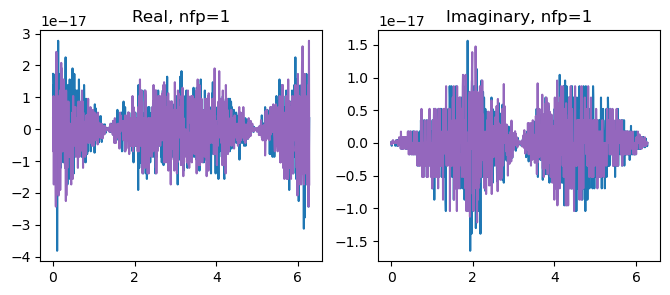

In [16]:
(J, Cb, Ck, Ct, I, II, III) = equilibrium_soft2.check_governing_equations(4)
J.display_content()
Cb.display_content()
Ck.display_content()
Ct.display_content()
I.display_content()
II.display_content()
III.display_content()


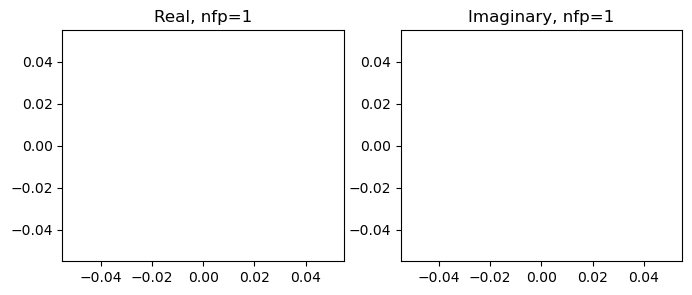

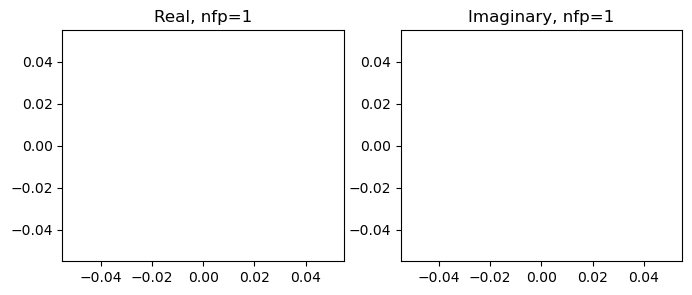

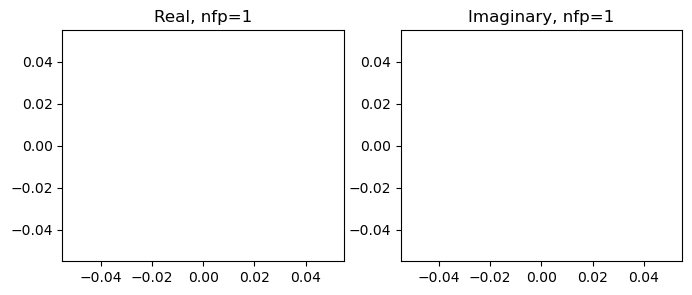

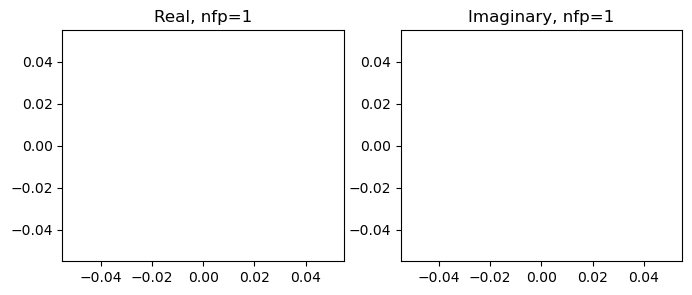

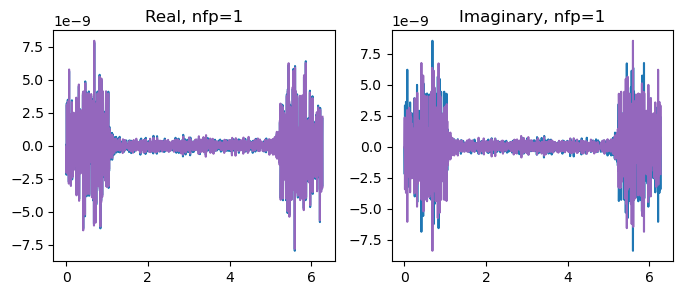

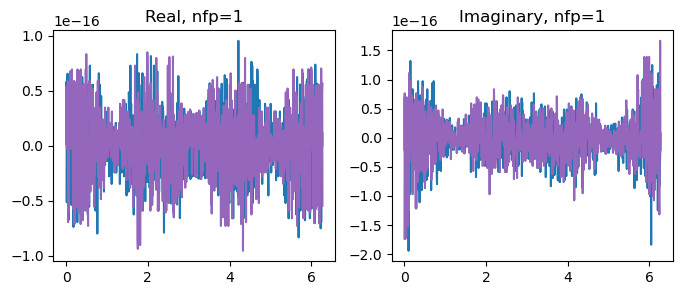

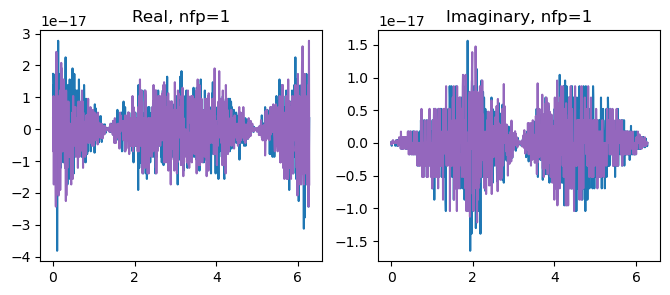

In [10]:
(J, Cb, Ck, Ct, I, II, III) = equilibrium_soft.check_governing_equations(4)
J.display_content()
Cb.display_content()
Ck.display_content()
Ct.display_content()
I.display_content()
II.display_content()
III.display_content()


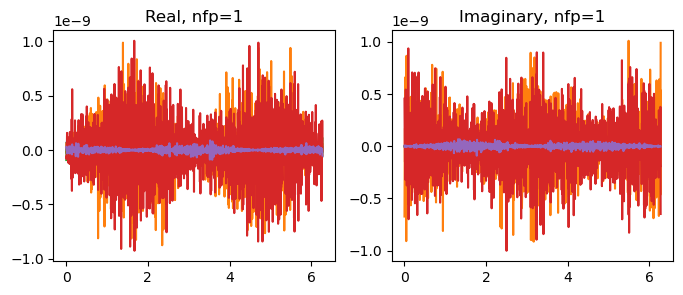

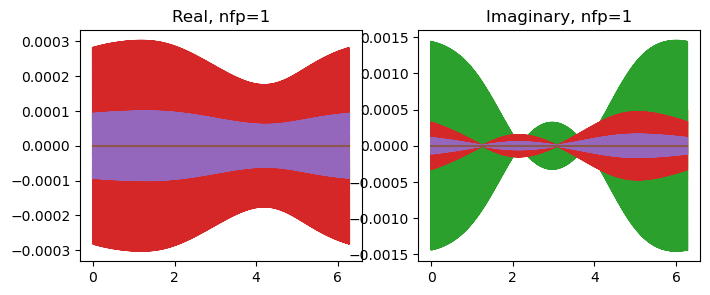

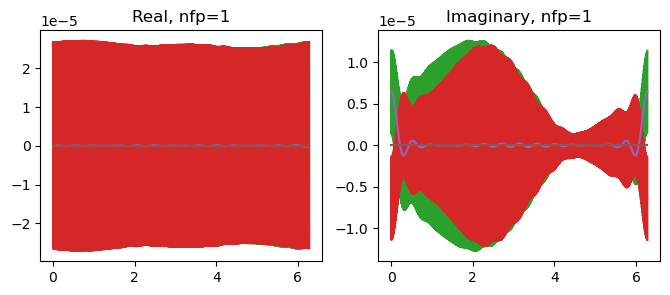

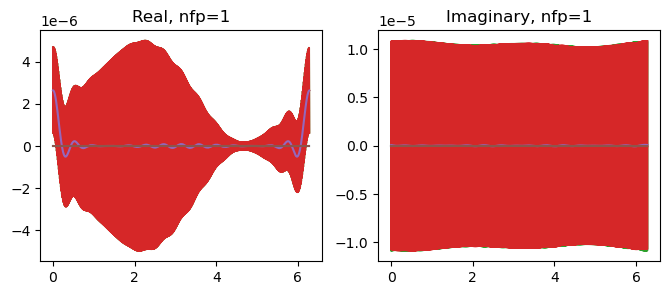

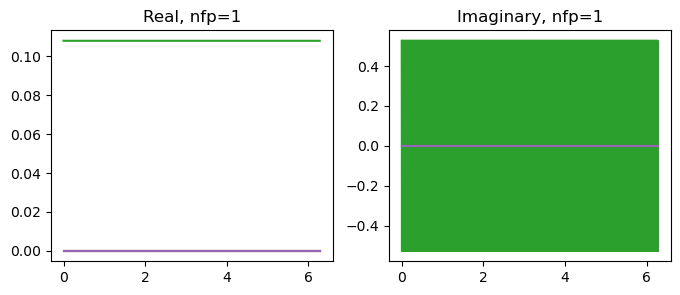

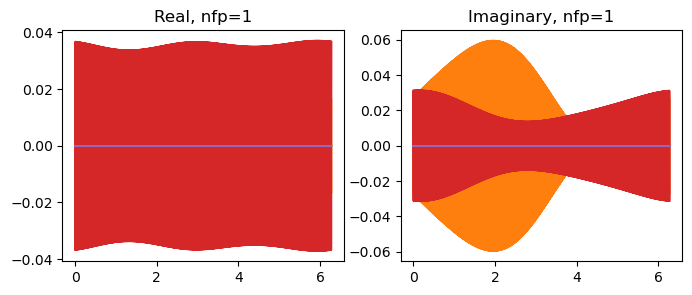

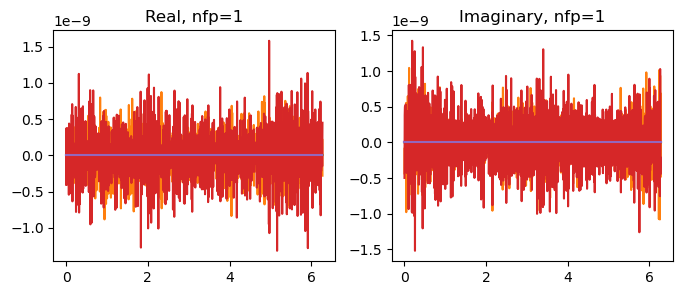

In [15]:
(J_hard, Cb_hard, Ck_hard, Ct_hard, I_hard, II_hard, III_hard) = equilibrium_hard.check_governing_equations(4)
J_hard.display_content()
Cb_hard.display_content()
Ck_hard.display_content()
Ct_hard.display_content()
I_hard.display_content()
II_hard.display_content()
III_hard.display_content()


In [ ]:
compare_chiphifunc(J, J_hard)
compare_chiphifunc(Cb, Cb_hard)
compare_chiphifunc(Ck, Ck_hard)
compare_chiphifunc(Ct, Ct_hard)
compare_chiphifunc(I, I_hard)
compare_chiphifunc(II, II_hard)
compare_chiphifunc(III, III_hard)

In [ ]:
ttfomd_result = to_tensor_fft_op_multi_dim(
    ChiPhiFunc_in=equilibrium.unknown['X_coef_cp'][1], dphi=0, dchi=0,
    num_mode=1, cap_axis0=equilibrium.unknown['X_coef_cp'][1].content.shape[0],
    nfp=equilibrium.unknown['X_coef_cp'][1].nfp)

In [ ]:
to_tensor_result = to_tensor_fft_op(equilibrium.unknown['X_coef_cp'][1])

In [ ]:
to_tensor_result.shape

In [ ]:
ttfomd_result.shape

In [ ]:
jnp.all(jnp.isclose(ttfomd_result, to_tensor_result))